# Análise Exploratória



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Sex'].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
df.groupby(['Sex', 'Survived']).size().unstack()



Survived,0,1
Sex,,
female,81,233
male,468,109


In [10]:
df.groupby(['Sex', 'Pclass', 'Survived']).size().unstack()

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

# Aparentemente quem estava nas melhores cabines teve maior chance de sobrevivência

<Axes: >

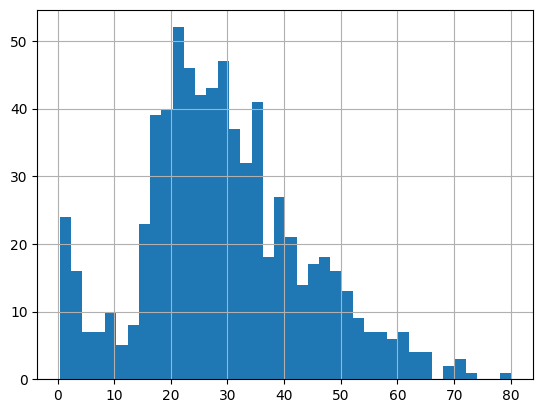

In [11]:
colunaidade = df['Age']
colunaidade.hist(bins=40)

In [12]:
idx = ['Age', 'Sex', 'Survived']
newdf = df.filter(items=idx)
newdf = newdf.dropna()
newdf.head()


,Age,Sex,Survived
0,22.0,male,0
1,38.0,female,1
2,26.0,female,1
3,35.0,female,1
4,35.0,male,0


In [13]:
colunaidade = newdf['Age']
colunasex = newdf['Sex']
menores = newdf[colunaidade < 18]
maiores = newdf[colunaidade >= 18]
display(menores.groupby('Sex').size(), maiores.groupby('Sex').size())


Sex
female    55
male      58
dtype: int64

Sex
female    206
male      395
dtype: int64

In [14]:
menores.groupby(['Sex', 'Survived']).size().unstack()


Survived,0,1
Sex,,
female,17,38
male,35,23


In [15]:
maiores.groupby(['Sex', 'Survived']).size().unstack()

Survived,0,1
Sex,,
female,47,159
male,325,70
